In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [38]:
%cd /content/gdrive/MyDrive/Uni/Master/P4 2021/DD2424 - Deep Learning for Data Science/Project/ScarceClassifier

/content/gdrive/MyDrive/Uni/Master/P4 2021/DD2424 - Deep Learning for Data Science/Project/ScarceClassifier


In [54]:
from src.d04_mixmatch.vanilla_net import VanillaNet
from src.d02_data.load_data import get_dataloaders
from src.d07_visualization.visualize_cifar10 import show_img
import torch
import torch.nn as nn
import torch.optim as optim

In [55]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


Files already downloaded and verified
Files already downloaded and verified


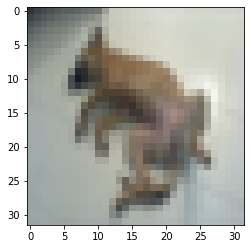

In [56]:
# Load data
trainset, trainloader, testset, testloader = get_dataloaders(path='/data')

# show image
show_img(iter(trainloader).next()[0][0])

In [57]:
# Create model 
net = VanillaNet()
net.to(device)

# Select loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

n_epochs = 100

In [ ]:
# Train
for epoch in range(n_epochs): 

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device) # send to cuda

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.042
[1,  4000] loss: 1.682
[1,  6000] loss: 1.611
[1,  8000] loss: 1.540
[1, 10000] loss: 1.492
[1, 12000] loss: 1.459
[2,  2000] loss: 1.392
[2,  4000] loss: 1.364
[2,  6000] loss: 1.340
[2,  8000] loss: 1.297
[2, 10000] loss: 1.311


In [51]:
# calculate accuracy
correct, total = 0, 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))


Accuracy of the network on the 10000 test images: 50 %


In [45]:
# Save model
model_save_name = 'vanilla_net.pt'
path = F"/content/gdrive/MyDrive/Uni/Master/P4 2021/DD2424 - Deep Learning for Data Science/Project/ScarceClassifier/models/{model_save_name}"
torch.save(net.state_dict(), path)

In [49]:
# Load model
model_save_name = 'vanilla_net.pt'
path = F"/content/gdrive/MyDrive/Uni/Master/P4 2021/DD2424 - Deep Learning for Data Science/Project/ScarceClassifier/models/{model_save_name}"
net.load_state_dict(torch.load(path))


<All keys matched successfully>